In [1]:
from rdkit import Chem

from lammps_utils.io import MolFromLAMMPSData, load_data, load_dump
from lammps_utils.io._load import unwrap_molecule_df_under_pbc
from lammps_utils.rdkit import compute_density, compute_rg, find_main_chains

In [2]:
df_atoms, df_bonds, cell_bounds = load_data(
    "eq3.data", return_bond_info=True, return_cell_bounds=True
)
df_atoms.head()

,mol,type,charge,x,y,z,symbol
id,,,,,,,
1,1,1,-0.064799,-6.119567,-2.792770,6.644198,C
2,1,2,0.023057,-5.427495,-3.333165,5.986565,H
3,1,2,0.023057,-5.555218,-2.046246,7.216636,H
4,1,2,0.023057,-6.847587,-2.213918,6.062487,H
5,1,1,-0.049212,-6.948701,-3.722613,7.606304,C


In [3]:
df_bonds.head()

,type,atom1,atom2
id,,,
1,4,322,323
2,5,322,330
3,4,320,321
4,5,320,328
5,4,319,320


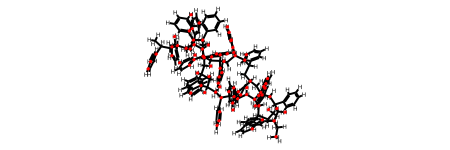

In [4]:
mol = MolFromLAMMPSData("eq3.data")
mol

In [5]:
compute_density(mol, cell_size=tuple(map(lambda x: x[1] - x[0], cell_bounds)))

1.0049222293225102

In [6]:
for submol in find_main_chains(mol):
    print(compute_rg(submol))

6.652574718188852
6.679372676889548


In [7]:
for submol in Chem.GetMolFrags(mol, asMols=True):
    print(compute_rg(submol))

7.266042558496575
7.500022180726575


In [8]:
for submol in Chem.GetMolFrags(mol, asMols=True):
    print(compute_rg(submol, removeHs=True))

7.011664132396845
7.261304301777765


0
6.652573854490679
6.679373574850509
7.266038021111111
7.500017705958163
7.011664384645318
7.261305049731375


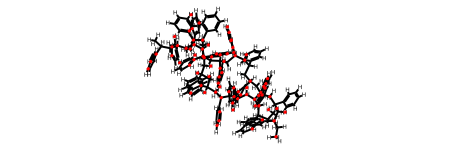

1000
6.5463679260157726
6.459267858372479
7.185279264751678
7.433342292132434
6.914492876054356
7.210476664804795


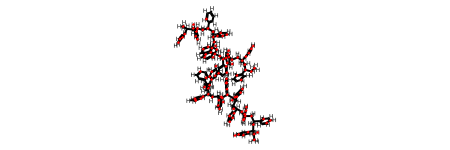

2000
6.447502503238806
6.46402103553278
7.2692637465679235
7.3368923981323215
7.02558279437073
7.084557892754044


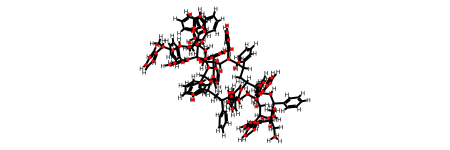

3000
6.55959525032121
6.4646716388421535
7.32456031241647
7.367690257579781
7.057403816556924
7.144759088788307


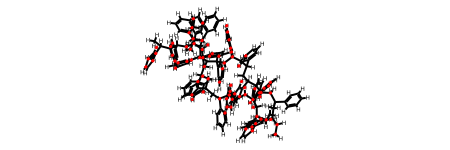

4000
6.527613937564813
6.531197811516777
7.225836723325182
7.459348295277018
6.970780044493835
7.223751169673397


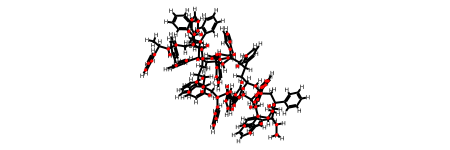

5000
6.5229121041595315
6.561889214686887
7.253874442945927
7.374765415140485
6.998175588065535
7.131454005908251


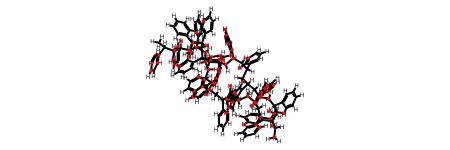

In [9]:
for i_frame, df_atoms_dump, cell_bounds in load_dump(
    "eq3.dump", return_cell_bounds=True, n_jobs=8
):
    df_atoms_whole = unwrap_molecule_df_under_pbc(
        df_atoms_dump, df_bonds, cell_bounds
    )
    conf = mol.GetConformer()
    conf.SetPositions(
        df_atoms_whole.loc[:, ["x", "y", "z"]].sort_index().values
    )
    print(i_frame)
    for submol in find_main_chains(mol):
        print(compute_rg(submol))

    for submol in Chem.GetMolFrags(mol, asMols=True):
        print(compute_rg(submol))

    for submol in Chem.GetMolFrags(mol, asMols=True):
        print(compute_rg(submol, removeHs=True))
    display(mol)

    if i_frame > 4500:
        break